# Основы статистики. Нормальное распределение. Правило трех сигм.

## Что такое вероятность?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import random

EXPERIMENTS_NUMBER = 10

# Достаем из "коробки" предметы разного цвета, какова вероятность вытащить красный предмет?
box = ['red', 'red', 'green', 'blue', 'blue', 'blue']
results = []

# Проводим несколько испытаний
for _ in range(EXPERIMENTS_NUMBER):
  results.append(random.choice(box))
count_of_reds = sum(list(map(lambda x: x == 'red', results)))

# Отношение числа "благоприятных исходов" к их общему количеству
count_of_reds / len(results)

0.3

In [ ]:
2 / 6

0.3333333333333333

Вероятность — это частота благоприятных исходов или степень нашей уверенности в том, что событие случится?

  ## Вероятность и случайная величина


In [ ]:
# Представим, что в нашей "коробке" теперь находятся не цвета, а числа
EXPERIMENTS_NUMBER = 1000

box = [3, 3, 5, 4, 4, 4]
results = []

# Проводим несколько испытаний
for _ in range(EXPERIMENTS_NUMBER):
  results.append(random.choice(box))

results[:10]

[4, 4, 4, 3, 3, 3, 4, 3, 4, 5]

In [ ]:
print(f'Количество 3: {results.count(3)}. Вероятность получить 3 = {results.count(3) / len(results)}')
print(f'Количество 4: {results.count(4)}. Вероятность получить 4 = {results.count(4) / len(results)}')
print(f'Количество 5: {results.count(5)}. Вероятность получить 5 = {results.count(5) / len(results)}')

Количество 3: 334. Вероятность получить 3 = 0.334
Количество 4: 498. Вероятность получить 4 = 0.498
Количество 5: 168. Вероятность получить 5 = 0.168


(array([322.,   0.,   0.,   0.,   0., 493.,   0.,   0.,   0., 185.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

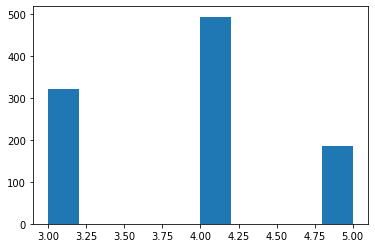

In [ ]:
import matplotlib.pyplot as plt
plt.hist(results)

In [ ]:
pd.Series(results, name='experiment_results')

0      4
1      4
2      4
3      3
4      3
      ..
995    5
996    4
997    4
998    4
999    4
Name: experiment_results, Length: 1000, dtype: int64

4    511
3    332
5    157
Name: experiment_results, dtype: int64
4    0.511
3    0.332
5    0.157
Name: experiment_results, dtype: float64


<BarContainer object of 3 artists>

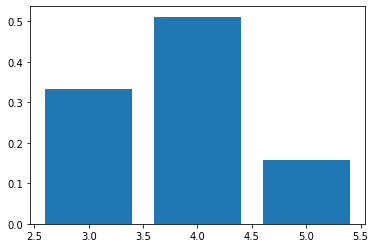

In [ ]:
# Создаем Pandas Series из списка результатов, так будет удобнее работать
exp_results = pd.Series(results, name='experiment_results')
# Получаем количества уникальных значений
print(exp_results.value_counts())
exp_probabilities = exp_results.value_counts() / len(results)
print(exp_probabilities)
plt.bar(height=exp_probabilities, x=exp_probabilities.index)

Обратите внимение, что вероятность получить значения, отличные от 3, 4 и 5 равна 0. Сумма всех вероятностей равна 1 (мы указали все исходы нашего эксперимента).

## Какие бывают данные и как с ними работать?

![data-types[1].jpg](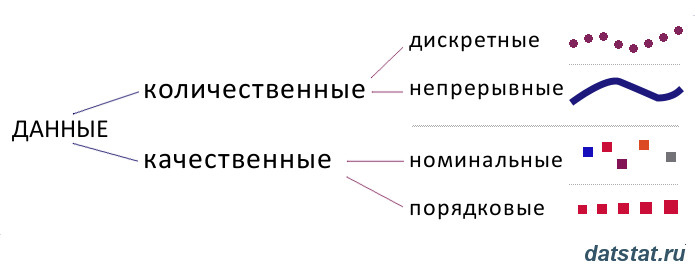)

URL: https://datstat.ru/tipyi-dannyih-v-statistike/

### Количественные непрерывные данные

In [ ]:
import pandas as pd
df_cars = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
df_cars.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu


In [ ]:
df_cars.displacement.mean()

193.42587939698493

In [ ]:
df_cars.displacement.median()

148.5

In [ ]:
df_cars.displacement.mode()

0    97.0
dtype: float64

Примерами количественных непрерывных данных являются: mpg (расход топлива),  displacement (объем двигателя), horsepower (мощность двигателя), weight (вес в кг), acceleration (ускорение). Наиболее часто используется float для хранения таких данных.

### Количественные дискретные данные

Эти данные определены только среди целочисленных значений. В данном датасете примерами таких данных являются cylinders (количество цилиндров) и model_year (год выпуска модели). Часто используется для обозначения количества объектов. Наиболее часто используется тип int для таких данных.

![798[1].jpg](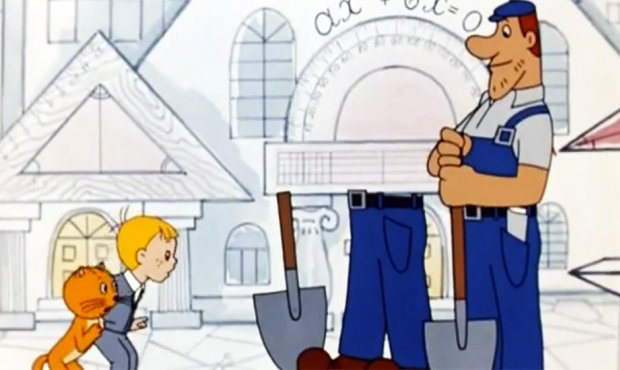)

Обратите внимание, если исходные дискретные данные имеют тип float, то возможно есть ошибка и/или пропущенные значения.

In [ ]:
df_cars_wrong = df_cars.copy()
df_cars_wrong.loc[12, 'cylinders'] = None
df_cars_wrong.loc[8, 'cylinders'] = 7.5

In [ ]:
df_cars_wrong.head(13)

In [ ]:
# Проверим значения 'cylinders' на наличие пропусков
df_cars_wrong['cylinders'].isna().sum()

1

In [ ]:
# Посмотрим на строку с пропущенным значением
df_cars_wrong[df_cars_wrong['cylinders'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
12,15.0,NaN,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo


In [ ]:
# Один из способов проверки на дробные значения
all(round(df_cars_wrong['cylinders']) == df_cars_wrong['cylinders'])

False

In [ ]:
all(round(df_cars['cylinders']) == df_cars['cylinders'])

### Качественные порядковые данные

Используются в тех случаях, когда мы не можем напрямую измерить величину, но можем понять, какое из этих значений больше или меньше и указать порядок этих значений. Примерами таких величин могут служить школьные оценки, оценка сервиса по шкале от "плохо" до "отлично", уровень пакета услуг от "бюджетного" до "VIP", тяжесть состояния пациента  и др.

In [ ]:
# Пример такой переменной можно найти в другом открытом датасете
df_titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


В данном случае примером качественной порядковой переменной является 'class' (то, каким классом следовал пассажир от First - самый дорогой до Third - самый бюджетный). В датафрейме есть также числовая разметка для этих данных - 'pclass'. Представим, что 'pclass' отсутствует и мы имеем только серия 'class'. Выполним разметку самостоятельно

In [ ]:
# Получим все уникальные значения в серии
df_titanic['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [ ]:
# Словарь для разметки переменной: ключи - значения в серии, значения словария - числовые метки, которые мы планируем присвоить
titanic_class_dict = {
    'First': 1,
    'Second': 2,
    'Third': 3,
}
df_titanic['class_copy'] = df_titanic['class'].map(titanic_class_dict)
df_titanic[['class','class_copy']]

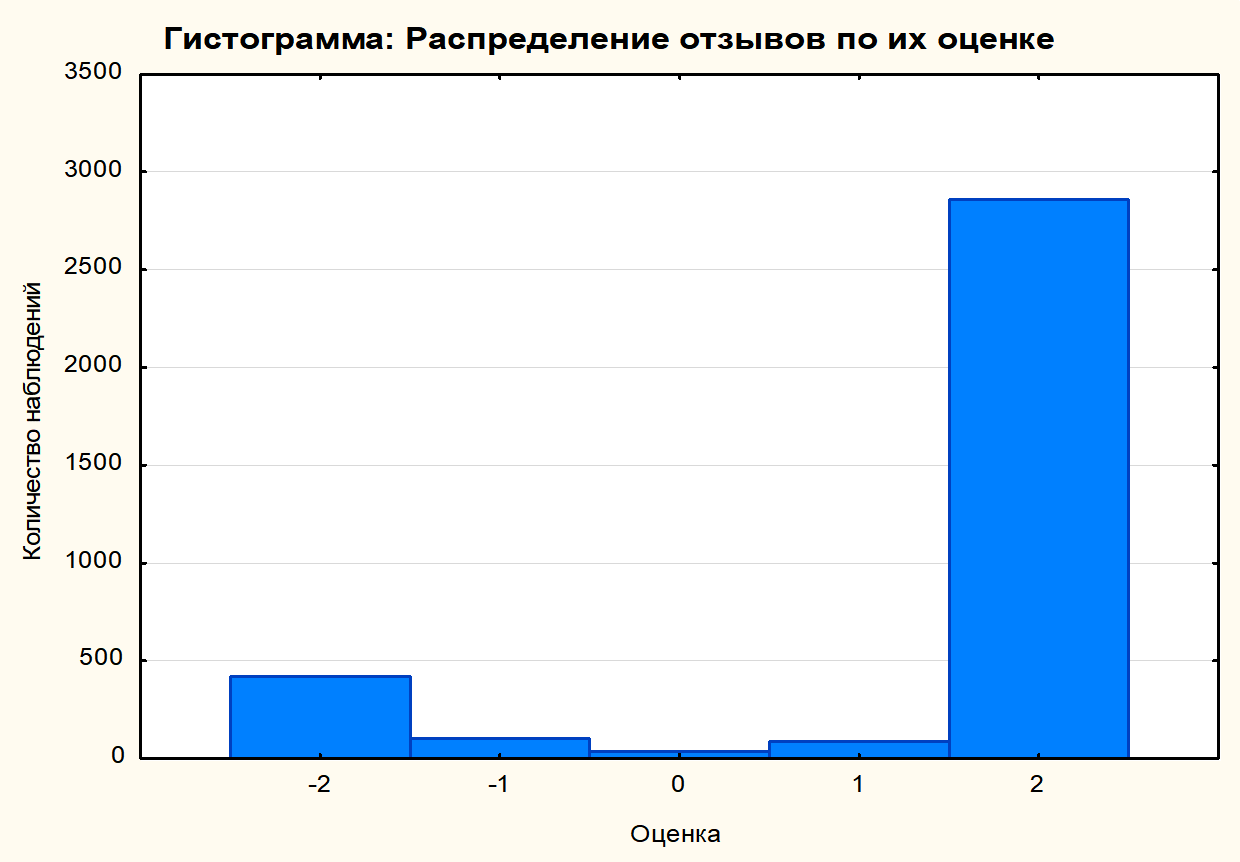

### Качественные бинарные данные

Бинарные данные имеют только 2 альтернативных варианта: выжил ли пассажир Титаника или нет (alive и его размеченный аналог survived) мужской или женский пол (sex), пассажир - взрослый мужчина или нет (adult_male), был ли пассажир один или с семьей (alone). Может быть закодирован как pd.Categorical, bool или как int c двумя возможными значениями: 0 или 1.

In [ ]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_copy
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [ ]:
# Используем pd.Categorical, чтобы автоматически присвоить коды для переменных
alive_categories = pd.Categorical(df_titanic['alive'])
alive_categories

['no', 'yes', 'yes', 'yes', 'no', ..., 'no', 'yes', 'no', 'yes', 'no']
Length: 891
Categories (2, object): ['no', 'yes']

In [ ]:
alive_categories.codes[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int8)

In [ ]:
# Бинарные данные как bool значение
alive_bool = (alive_categories == 'yes')
alive_bool[:20]

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True])

In [ ]:
# alive_bool теперь можно перевести в int
alive_bool.astype(int)[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

### Качественные номинальные данные

Представляют собой категории, которые не поддаются измерению или сравнению. Примерами могут служить embarked и embark_town (город отправления), who (взрослый мужчина, взрослая женщина или ребенок), deck (палуба).

In [ ]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_copy
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [ ]:
# Способ закодировать номаниальные данные №1: Представить как несколько бинарных данных
# One-hot encoding

# Простой способ
pd.get_dummies(df_titanic, columns=['embark_town'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,yes,True,1,0,0


In [ ]:
# # Способ, позволяющий также учитывать и новые переменные
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np

# # Создаем кодировщик
# encoder = OneHotEncoder(handle_unknown="ignore")
# encoder.fit(df_titanic[['embark_town']])

# # Применяем преобразование из кодировщика
# encoded_array = encoder.transform(df_titanic[['embark_town']]).toarray()
# encoder_categories = encoder.categories_
# one_hot_features = pd.DataFrame(
#     data=encoded_array,
#     columns=encoder_categories[0],
#     index=df_titanic.index,
# )
# one_hot_features

,Cherbourg,Queenstown,Southampton,NaN
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [ ]:
# df_titanic.join(one_hot_features, how='inner')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Cherbourg,Queenstown,Southampton,NaN
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.0,0.0,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0.0,0.0,1.0,0.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1.0,0.0,0.0,0.0


In [ ]:
# encoder.inverse_transform(one_hot_features)[:20]

array([['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg']], dtype=object)

In [ ]:
# Способ закодировать номаниальные данные №2: Присвоить номинальным данным уникальный код
# Label encoding
pd.Categorical(df_titanic['embark_town'])[:20]

['Southampton', 'Cherbourg', 'Southampton', 'Southampton', 'Southampton', ..., 'Southampton', 'Queenstown', 'Southampton', 'Southampton', 'Cherbourg']
Length: 20
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [ ]:
pd.Categorical(df_titanic['embark_town'])[:20].codes

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0],
      dtype=int8)

In [ ]:
# # Тоже самое, но при помощи библиотеки sklearn
# from sklearn.preprocessing import LabelEncoder

# # Создаем кодировщик
# label_encoder = LabelEncoder()
# # fit_transform позволяет сразу и "подогнать" кодировщик и получить закодированные значения
# label_encoded_embark = label_encoder.fit_transform(df_titanic['embark_town'])
# label_encoded_embark[:20]

In [ ]:
# Обратное преобразование из меток в текстовые значения
# label_encoder.inverse_transform(label_encoded_embark)[:20]

## Описательные статистики

### Меры центральной тенденции

#### Среднее арифметическое

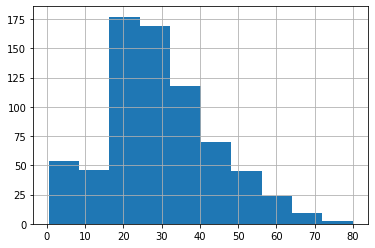

In [ ]:
df_titanic['age'].dropna().hist()

In [ ]:
df_titanic['age'].mean()

29.69911764705882

#### Среднее усеченное значение

In [ ]:
from scipy.stats import trim_mean
trim_mean(df_titanic['age'].dropna(), 0.1)

29.26923076923077

#### Медиана

In [ ]:
df_titanic['age'].median()

28.0

#### Мода

In [ ]:
df_titanic['age'].mode()

0    24.0
dtype: float64

Робастность - устойчивость к выбросам. Выбросы - экстремальные значения в выборке: очень большие или очень маленькие

In [ ]:
import numpy as np

no_outlier_data = np.random.normal(3, 2, size=100)
no_outlier_data

array([ 2.662931  ,  7.95043363,  0.80981604,  3.78325192,  5.79635793,
        2.7190432 ,  2.75473646,  4.11301403,  4.40243843,  6.51431928,
        4.94850777,  4.47277995,  6.98643195,  5.71577003,  3.89281346,
        1.67249157,  4.2651603 ,  3.38243969,  5.64296996,  1.17087776,
        2.5455387 ,  5.02143121,  0.01923633,  2.31246099,  4.4910369 ,
        2.22302371,  2.60136214,  3.16875548,  6.92908165,  1.85610742,
        3.27111702,  3.09761401,  1.03266506, -0.51318101,  3.55826917,
        3.99789753,  4.27082591,  1.66994367,  0.61869604, -1.0375911 ,
        0.7989774 ,  1.48657262,  3.69578683,  4.03185141,  0.18562811,
        1.67061317,  6.56610746, -1.12908777, -0.06795735,  4.49594753,
        2.11197952,  1.29614748,  4.00887207,  5.68948504,  2.98182508,
        5.07371829,  2.40518091, -0.6496816 ,  2.18430232,  5.45485687,
        1.88491179,  1.08286109,  4.83513538,  9.39250717,  3.73152505,
        2.48901035,  4.69683033,  2.45744505,  3.54354076,  0.17

In [ ]:
outlier_data = np.append(no_outlier_data, 1000000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


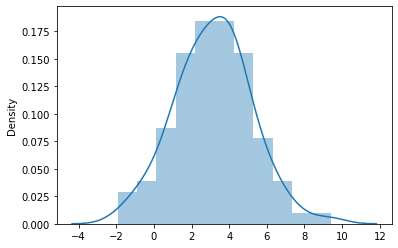

In [ ]:
import seaborn as sns
sns.distplot(no_outlier_data)

In [ ]:
import seaborn as sns
sns.distplot(outlier_data)

NameError: ignored

In [ ]:
from scipy.stats import trim_mean, mode
print(f'Mean: no outlier {no_outlier_data.mean()}; outlier {outlier_data.mean()}')
print(f'Trim mean 95%: no outlier {trim_mean(no_outlier_data, 0.05)}; outlier {trim_mean(outlier_data, 0.05)}')
print(f'Median: no outlier {np.median(no_outlier_data)}; outlier {np.median(outlier_data)}')
print(f'Mode: no outlier {mode(no_outlier_data)[0]}; outlier {mode(outlier_data)[0]}')

Mean: no outlier 3.146170459655133; outlier 9904.105119266986
Trim mean 95%: no outlier 3.133814188148551; outlier 3.1715316966065
Median: no outlier 3.154255133097898; outlier 3.168755480291609
Mode: no outlier [-1.92125135]; outlier [-1.92125135]


### Меры вариабельности признака

#### Размах

In [ ]:
df_titanic['age'].max() - df_titanic['age'].min()

NameError: ignored

#### Дисперсия

In [ ]:
df_titanic['age'].var()

#### Стандартное отклонение

In [ ]:
df_titanic['age'].std()

#### Коэффициент вариации

In [ ]:
from scipy.stats import variation
variation(df_titanic['age'].dropna())

NameError: ignored

#### Квантили и межквартильный интервал

Квантиль — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Или то значение, которое больше, чем определенное количество значений в выборке

In [ ]:
# Примеры квантилей
print(f'Медиана {df_titanic["age"].quantile(0.5)}') # Больше 50% выборки
print(f'Нижний квартиль {df_titanic["age"].quantile(0.25)}') # Больше 25% выборки
print(f'Верхний квартиль {df_titanic["age"].quantile(0.75)}') # Больше 75% выборки
# Децили - квантили кратные 10%
print(f'Первый дециль {df_titanic["age"].quantile(0.1)}') # Больше 10% выборки
print(f'Девятый дециль {df_titanic["age"].quantile(0.9)}') # Больше 10% выборки
# Процентили - квантили, кратные 1%
print(f'Пятый процентиль {df_titanic["age"].quantile(0.05)}') # Больше 5% выборки
print(f'Девяносто пятый процентиль {df_titanic["age"].quantile(0.95)}') # Больше 95% выборки

In [ ]:
IQR = df_titanic["age"].quantile(0.75) - df_titanic["age"].quantile(0.25)
IQR

In [ ]:
# Выброс - значение, выходящее за тройной межквартильный интервал
# Вот как правильно его найти
print(f'Нижняя граница IQR3 {df_titanic["age"].quantile(0.25) - IQR * 1.5 }')
print(f'Верхняя граница IQR3 {df_titanic["age"].quantile(0.75) + IQR * 1.5 }')

In [ ]:
# Основные базовые статистики в одном методе
df_titanic["age"].describe()

### Более компактные способы визуализации распределения данных

In [ ]:
# Диаграмма "Ящик с усами"
import seaborn as sns
sns.boxplot(data=df_titanic, y='age') # x='alive')

NameError: ignored

In [ ]:
# "Скрипичная диаграмма"
sns.violinplot(data=df_titanic, y='age', x='alive')

Нежелательно добавлять больше 2 "ящиков с усами" на один график

## Генеральная совокупность и выборка

Генеральная совокупность - общая совокупность объектов, подлежащих измерению.
Выборка - часть генеральной совокупности, доступная измерению.

In [ ]:
import numpy as np
import pandas as pd
# Создадим свою "генеральную совокупность"
df_general = pd.DataFrame(data=np.random.normal(70, 5, size=1000), columns=['weight'])
df_general

,weight
0,71.807498
1,72.950764
2,73.510829
3,64.485900
4,75.501599
...,...
995,69.625677
996,70.925449
997,63.043469
998,72.401165


In [ ]:
df_general.describe()

,weight
count,1000.000000
mean,69.584350
std,5.096136
min,52.713809
25%,66.183133
50%,69.744852
75%,73.221072
max,84.000739


In [ ]:
# По умолчанию pandas рассчитывает стандартное отклонение для выборки, будем рассчитывать его для генеральной совокупности
df_general.std(ddof=0) # Количество степеней свободы N-ddof, для генеральной совокупности ddof=0

weight    5.093587
dtype: float64

In [ ]:
# Проведем несколько экспериментов на выборках и попытаемся получить среднее значение
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 10
df_means = pd.DataFrame()
for experiment_num in range(N_EXPERIMENTS):
  df_mean_tmp = df_general.sample(SAMPLE_SIZE).mean()

  df_mean_tmp.index = [experiment_num]
  df_means = pd.concat([df_means, df_mean_tmp])
df_means.columns = ['sample_means']
df_means

,sample_means
0,71.353660
1,70.052629
2,69.288296
3,69.448594
4,69.140788
...,...
995,68.611797
996,71.565045
997,69.562928
998,70.070978


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb542054a50>]],
      dtype=object)

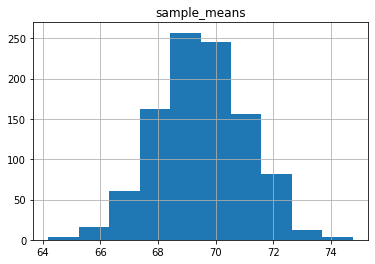

In [ ]:
df_means.hist()

Можно дать интервальную оценку среднего значения в выборке. Эта оценка называется стандартной ошибкой среднего значения

### Стандартная ошибка как интервальная оценка среднего значения

In [ ]:
df_general.sample(100).sem()

weight    0.510691
dtype: float64

Но сколько же % значений попадет попадет в интервал [mean - std; mean + std] или [mean - sem; mean + sem]?

## Нормальное распределение случайной величины

![1_IZ2II2HYKeoMrdLU5jW6Dw[1].png](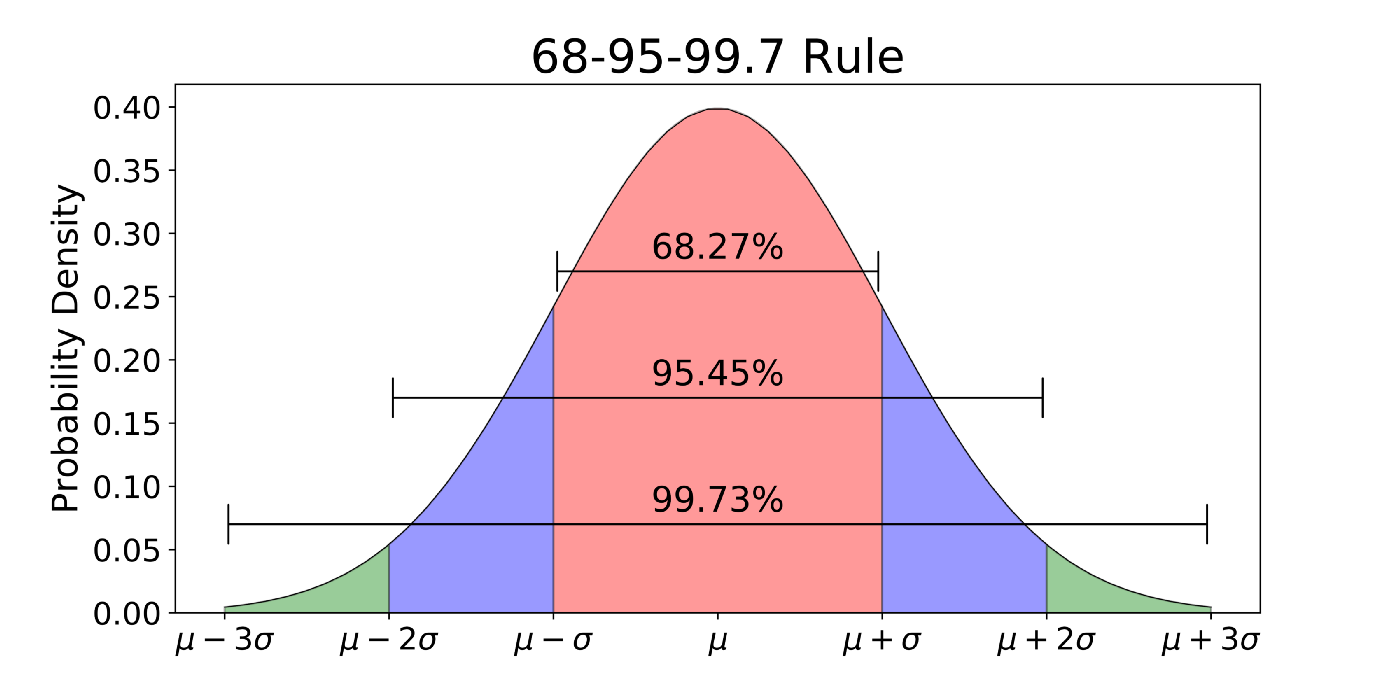)

У данного распределения есть 2 параметра - среднее значение и стандартное отклонение.

![bellformula-56b749555f9b5829f8380dc8[1].jpg](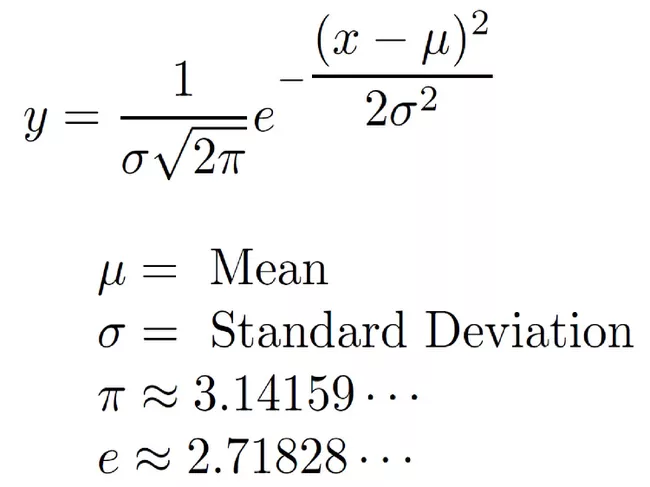)

In [ ]:
import numpy as np
# Правило трех сигм на реальном примере
normal_sample = np.array(np.random.normal(170, 10, 1000), dtype='int')
normal_sample[:10]

array([182, 167, 176, 185, 167, 152, 175, 167, 163, 172])

In [ ]:
sigma_count = 2
sample_mean = normal_sample.mean()
sample_std = normal_sample.std()
selection_condition_less = normal_sample < (sample_mean + sigma_count * sample_std)
selection_condition_greater = normal_sample > (sample_mean - sigma_count * sample_std)
selection_condition = selection_condition_less & selection_condition_greater
selection_condition[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selection_condition.sum() / len(selection_condition)

0.965

In [ ]:
# Интервалы для значений sigma можно получить и более быстрым путем при помощи scipy
from scipy.stats import norm # Импортируем нужное нам распределение
norm.interval(0.95, loc=sample_mean, scale=sample_std)

(149.59038222121245, 188.68161777878754)

Одним из свойств нормального распределения является то, что среднее арифметическое значение, медиана и мода равны.

In [ ]:
from scipy.stats import mode
print(f'mean: {normal_sample.mean()}')
print(f'median: {np.median(normal_sample)}')
print(f'mode: {mode(normal_sample)}')

mean: 169.136
median: 169.0
mode: ModeResult(mode=array([171]), count=array([49]))


Также нормальное распределение имеет коэффициент ассиметрии равный 0, а также коэффициент эксцесса, равный 0 (в определении Фишера).

### Коэффициент ассиметрии

Коэффициент ассиметрии показывает степень ассиметрии данного распределения. Для положительного коэффициента правый хвост будет длиннее левого, для отрицательного - левый хвост будет длиннее правого

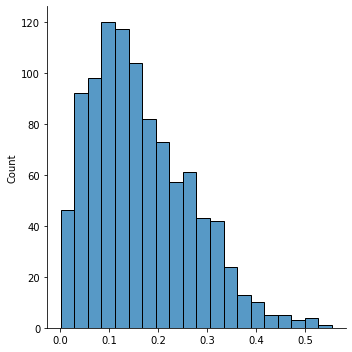

In [ ]:
import numpy as np
from scipy.stats import skew
import seaborn as sns

# Создадим выборку из случайных чисел, выбранных из бета-распределения
# Распределение с данными параметрами имеет длинный правый хвост
positive_skew = np.random.beta(2, 10, size=1000)
sns.displot(positive_skew)

In [ ]:
# Коэффициент ассиметрии +
skew(positive_skew)

0.7591955305470433

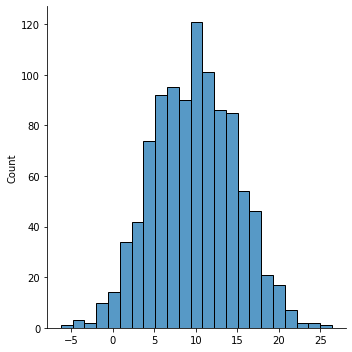

In [ ]:
# Создадим выборку из нормального распределения
no_skew = np.random.normal(10, 5, size=1000)
sns.displot(no_skew)

In [ ]:
# Коэффициент ассиметрии близок к 0
skew(no_skew)

0.03888037607860801

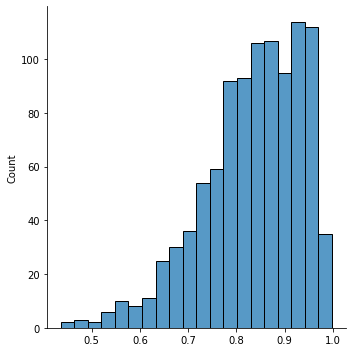

In [ ]:
# Создадим выборку из случайных чисел, выбранных из бета-распределения
# Распределение с данными параметрами имеет длинный левый хвост
negative_skew = np.random.beta(10, 2, size=1000)
sns.displot(negative_skew)

In [ ]:
# Коэффициент ассиметрии отрицательный
skew(negative_skew)

-0.8247346144248554

### Коэффициент эксцесса

Данный коэффициент описывает то, насколько выражен пик распределения случайной величины.

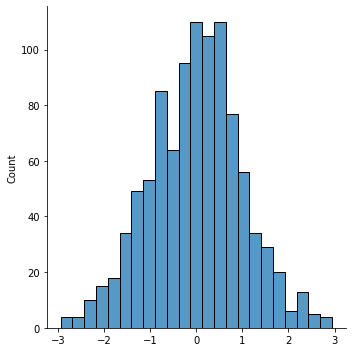

In [ ]:
from scipy.stats import kurtosis
normal_0_1 = np.random.normal(size=1000)
# Нормальное распределение N(0, 1)
sns.displot(normal_0_1)

In [ ]:
# Коэффициент эксцесса близок к 0
kurtosis(normal_0_1)

0.03828058195377482

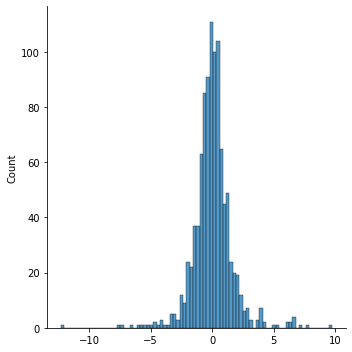

In [ ]:
# Распределение t-Стьюдента, о нем подробнее чуть ниже по тексту
t_student = np.random.standard_t(3, size=1000)

sns.displot(t_student)

In [ ]:
# Коэффициент эксцесса значительно больше нуля
kurtosis(t_student)

8.552707484369757

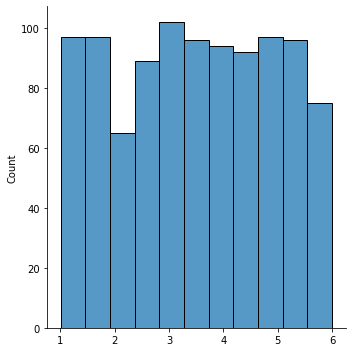

In [ ]:
# Равномерное распределение как яркий пример распределения без явного пика
uniform = np.random.uniform(1, 6, size=1000)

sns.displot(uniform)

In [ ]:
# Коэффициент эксцесса отрицательный
kurtosis(uniform)

-1.1737133246137061

### Как понять, насколько мое значение в выборке сильно отличается от среднего и сравнить со значением из другой выборки?

Мы можем использовать стандартизированную оценку (Z-оценка).

![Z-score-formula[1].jpg](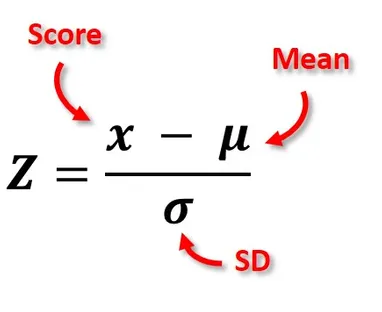)

In [ ]:
our_value = 181
z_score = (our_value - normal_sample.mean()) / normal_sample.std()
z_score

In [ ]:
# Мы можем перевести весь датасет в z-оценки, используя zscore из модуля scipy
from scipy.stats import zscore
zscore(normal_sample, ddof=1)[:10] # Задаем значение степеней свободы, т.к. по умолчанию оно равно 0

array([-0.01363077,  0.6879529 , -0.21408325,  0.78817914,  1.38953658,
        1.08885786, -0.01363077, -2.01815555,  0.98863162, -0.51476196])

### Доверительнй интервал

Если мы хотим понять, в какой интервал попадает попадает 95% (99%) средних значений в выборках при повторных измерениях мы используем доверительные интервалы.

In [ ]:
from scipy.stats import sem
# Во-первых нам необходимо рассчитать стандартную ошибку среднего значения (SEM)
sample_sem = sem(normal_sample)
sample_sem

0.3155139506472781

In [ ]:
# Затем, мы можем использовать нормальное распределение из scipy и найти доверительный интервал для 95% или 99%
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=sample_sem)

(168.51760402011138, 169.7543959798886)

## Распределение Стьюдента

Распределение Стьюдента имеет форму, похожую на нормальное распределение, но с "более тяжелыми хвостами". Уильям Госсет впервые опубликовал работы, связанные с этим распределением в журнале "Биометрика" под псевдонимом "Стьюдент". Уильям Госсет работал в пивоваренной компании Гинесс, и наработки по анализу распределений в малых выборках являлись коммерческой тайной, что побудило Госсета опубликоваться под псевдонимом, а не под реальным именем.

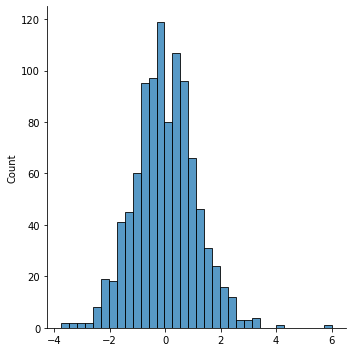

In [ ]:
import numpy as np
import seaborn as sns
# В данном распределении есть только один параметр - количество степеней свободы
sns.displot(np.random.standard_t(15, size=1000))

Данное распределение используется для интервальных оценок (например, чтобы рассчитать доверительный интервал) на малых выборках до 30 наблюдений.

In [ ]:
# Импортируем распределение t-Стьюдента и рассчитаем доверительный интервал
from scipy.stats import t
sample_sem = sem(normal_sample)
n = len(normal_sample)
degree_of_freedom = n - 1
t.interval(0.95, degree_of_freedom, loc=sample_mean, scale=sample_sem) # Помимо прочего, необходимо указать параметр df - количество степене свободы

NameError: ignored

### Статистические тесты на соответствие нормальному распределению

#### Тест Шапиро-Уилка

Тест на соответствие распределения нормальному распределению для малых выборок (n < 5000).

Проведение статистических тестов предполагает постановку гипотез.
*   H0-гипотеза ("нулевая гипотеза") - гипотеза, которая принимается в том случае, если результаты теста статистически не значимы. Зачастую, это гипотеза об отсутствии взаимосвязи между наблюдаемыми явлениями. Для теста Шапиро-Уилка H0-гипотеза состоит в том, что распределение соответствует норальному закону.
*   H1-гипотеза ("альтернативная гипотеза"). Принимается в том случае, если результаты теста статистически значимы. Для теста Шапиро-Уилка H1-гипотеза гласит, что имеются отличия от нормального распределения.

#### Что такое "статистическая значимость" и как ее определелить?

Перед тем, как провести статистический тест мы должны определиться с тем, какая вероятность ошибки для нас допустима. Вероятность нашей ошибки отображается понятием "p-уровень значимости".
<br>
**p-уровень значимости (p-value)** - вероятность случайного отклонения H0-гипотезы в том случае, когда она на самом деле верна (ошибка первого рода).
<br>
Наиболее популярными пороговыми значениями являются p<0.05 (с вероятностью α=0.95 мы верно отказываемся от H0-гипотезы), p<0.01 (α=0.99) и p<0.001 (α=0.999).

Внимание: тест Шапиро-Уилка для выборок больше n > 5000 может давать неверные значения p-value [Тест Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [ ]:
from scipy.stats import shapiro
shapiro(np.random.normal(80, 5, size=1000))

(0.998193621635437, 0.373388409614563)

### Тест Лилиефорса

Это модификация теста Колмогорова-Смирнова на соответствие выборки нормальному распределению. В отличие от теста Колмогорова-Смирнова для теста Лилиефорса не обязательно знать среднее значение и стандартное отклонение в генеральной совокупности.

*   H0-гипотеза: распределение в выборке соответствует нормальному
*   H1-гипотеза: распределение в выборке отличается от нормального



In [ ]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(np.random.normal(80, 5, size=900), 'norm')

(0.028794352524704192, 0.07514954609931455)